# Extraindo as Letras da Discografia do ZAYN

Zain Javadd Malik (Bradford, 12 de janeiro de 1993), profissionalmente conhecido como Zayn, é um cantor e compositor britânico. Ele ganhou proeminência no mercado musical após ter integrado a *boyband* One Direction junto com Harry Styles, Niall Horan, Liam Payne e Louis Tomlinson, quando competiram no programa de televisão *The X Factor*, em 2010. Embora tenham terminado em terceiro lugar, o grupo prontamente assinou um contrato discográfico com a *Sony BMG Music Entertainment* e a sua filial britânica *Syco Records*. Até março de 2015, os One Direction já haviam lançado quatro álbuns de estúdio, obtendo grande sucesso comercial a nível mundial, inclusive na América do Norte. Todavia, Malik expressou vontade de seguir carreira a solo após ter se debatido com tal possibilidade por bastante tempo e também porque isso o ajudaria a se sentir melhor mentalmente. A sua última apresentação pública como membro da *boyband* foi na paragem da *On The Road Again Tour* em Hong Kong, em 18 de março de 2015. Nesse período, foi reportado que a banda havia comercializado mais de 50 milhões de álbuns.

Após assinar um contrato discográfico com a *RCA Records*, o primeiro álbum de estúdio a solo de Malik, intitulado *Mind of Mine*, foi lançado a partir de fins de março de 2016, sendo imediatamente recebido com opiniões geralmente favoráveis pela crítica especialista em música contemporânea, que elogiou os talentos vocais e de composição do cantor, bem como a sua decisão de abandonar a sonoridade predominantemente *pop* em favor de uma gama de géneros musicais mais variados, inclusive o *R&B*. O disco foi listado como um dos melhores álbuns de 2016 em periódicos como o *Los Angeles Times* e o *The Observer*, além de ter sido um enorme sucesso comercial a nível mundial, marcando a primeira vez que uma obra musical liderou as tabelas musicais da iTunes Store em mais de 70 países e também estreando na primeira posição das tabelas musicais de países como o Reino Unido, Austrália, Canadá, Nova Zelândia, Portugal e EUA, onde Zayn se tornou no primeiro artista britânico masculino a solo a conseguir que tanto um álbum de estreia como um single de estreia alcançassem o cume das tabelas. O artista concretizou o mesmo feito também no Reino Unido. Na cerimónia de 2016 dos *American Music Awards*, venceu o prémio de "Artista Revelação do Ano".

Malik é muçulmano, tendo sofrido bastante discriminação em redes sociais pela sua religião, inclusive por personalidades mediáticas, o que o levou a participar de uma campanha social sobre legislação antiterrorista. É conhecido pelo grande número de tatuagens no seu corpo. Em abril de 2016, o site *Gigwise* estimou a fortuna do artista em cerca de 30 milhões de libras esterlinas.

Mais informações no link: https://pt.wikipedia.org/wiki/Zayn

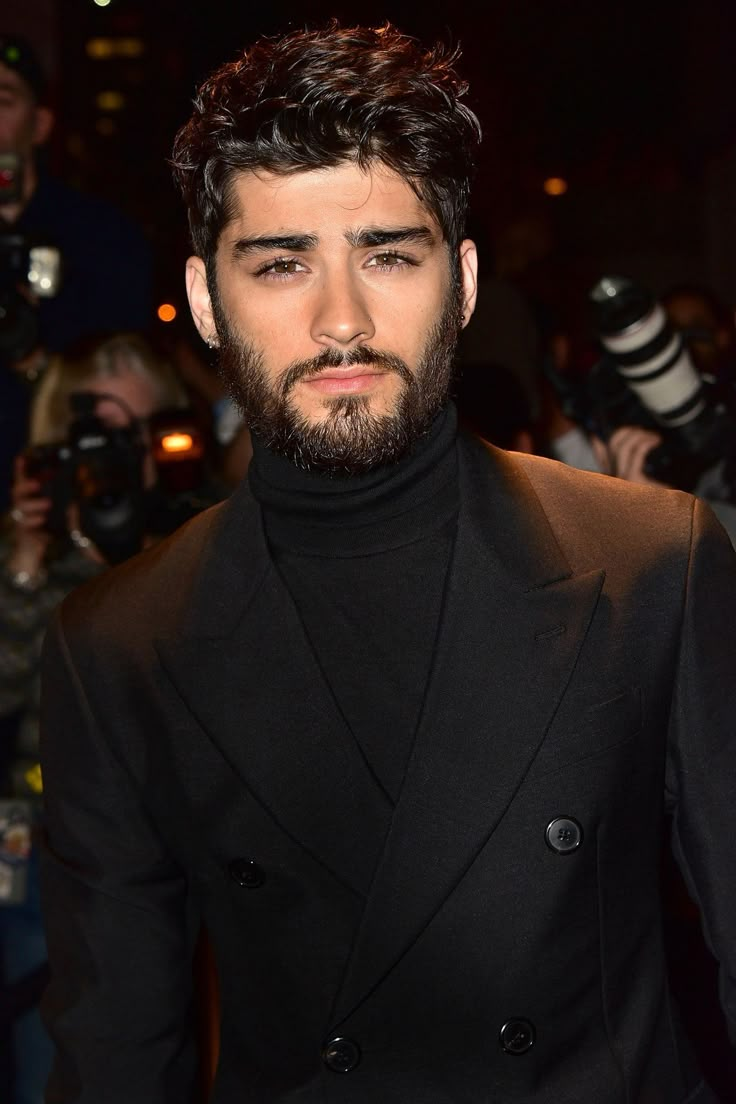



## API LyricsGenius
A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

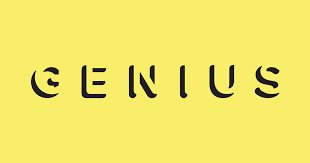

In [13]:
# Importando as bibliotecas
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
# Limitando para 70 músicas pois a discografia oficial é somente essa quantidade de músicas
artist = genius.search_artist("Zayn", max_songs=70)

Searching for songs by Zayn...

Changing artist name to 'ZAYN'
Song 1: "Dusk Till Dawn"
Song 2: "PILLOWTALK"
Song 3: "I Don’t Wanna Live Forever"
Song 4: "Let Me"
Song 5: "Entertainer"
Song 6: "​iT’s YoU"
Song 7: "Better"
Song 8: "Still Got Time"
Song 9: "Tightrope"
Song 10: "A Whole New World (End Title)"
Song 11: "Fingers"
Song 12: "​wRoNg"
Song 13: "Vibez"
Song 14: "Calamity"
Song 15: "Good Years"
Song 16: "BeFoUr"
Song 17: "​fOoL fOr YoU"
Song 18: "​dRuNk"
Song 19: "Outside"
Song 20: "There You Are"
Song 21: "Sweat"
Song 22: "LIKE I WOULD"
Song 23: "Too Much"
Song 24: "​lUcOzAdE"
Song 25: "​rEaR vIeW"
Song 26: "​sHe"
Song 27: "INTERMISSION: fLoWer"
Song 28: "TiO"
Song 29: "Unfuckwitable"
Song 30: "Rainberry"
Song 31: "River Road"
Song 32: "Love Like This"
Song 33: "Common"
Song 34: "BoRdErSz"
Song 35: "Windowsill"
Song 36: "Sour Diesel"
Song 37: "No Candle No Light"
Song 38: "Back To Life"
Song 39: "I Won’t Mind*"
Song 40: "Insomnia"
Song 41: "Flight Of The Stars"
Song 42: "Connexi

In [15]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_ZAYN.json.


In [19]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_ZAYN.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'iq', 'description_annotation', 'user', 'songs'])

In [21]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [23]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,release_year
0,Dusk Till Dawn,202 ContributorsTranslationsTürkçeEspañolPortu...,2017-09-08,2017
1,PILLOWTALK,145 ContributorsTranslationsPortuguêsΕλληνικάE...,2016-01-29,2016
2,I Don’t Wanna Live Forever,101 ContributorsTranslationsEspañolPortuguêsFr...,2016-12-09,2016
3,Let Me,93 ContributorsLet Me Lyrics“Let Me” was Zayn’...,2018-04-12,2018
4,Entertainer,69 ContributorsTranslationsPortuguêsРусский (R...,2018-05-23,2018
...,...,...,...,...
65,No Type (Remix),23 ContributorsNo Type (Remix) LyricsZayn Mali...,2015-06-15,2015
66,All That,34 ContributorsAll That Lyrics[Verse 1]\nWhen ...,2018-12-14,2018
67,"Me, Myself and I","15 ContributorsMe, Myself and I Lyrics[Intro]\...",2018-06-29,2018
68,My Woman,18 ContributorsTranslationsEspañolMy Woman Lyr...,2024-05-17,2024


In [25]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("ZAYNLyrics.csv", index=False)

In [27]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('ZAYN.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Dusk Till Dawn',
  'contributorstranslationst eespa olportugu deutschitalianodusk till dawn lyricson dusk till dawn zayn enlists song tell story lovers willing whatever takes stay together song released standalone single september read more  zayn tryna indie tryna cool just tryna this tell feel wind feel through windows inside room refrain zayn cause wanna touch baby wanna feel wanna rise sins just  zayn light make love tonight make fall love baby right here  zayn never alone dusk till dawn dusk till dawn baby right here hold things wrong dusk till dawn dusk till dawn baby right here post  zayn dusk till dawn baby right here  zayn shut like jacket would roll rapids find wave fits feel wind feel through windows inside room refrain zayn cause wanna touch baby wanna feel wanna rise sins just  zayn light make love tonight make fall love baby right here  zayn never alone dusk till dawn dusk till dawn baby right here hold things wrong dusk till dawn dusk till dawn baby right here bridge z